In [6]:
import sys; sys.path.append('..')
from osp import *
pd.options.display.max_colwidth = 200
pd.options.display.max_rows = 20

In [14]:
df_preds, df_feats, d_models = get_preds_feats()

In [15]:
df_feats

,feature,weight,run,feat_desc,comparison,group1,group2,score_mean1,score_mean2,score_z1,...,score_mean_diff_pct,score_mean_div,score_mean_div_abs,score_z_diff,score_z_diff_abs,score_z_diff_pct,score_z_div,score_z_div_abs,feat_name,feat_type
58,pos_FW,0.987452,4.5,NaN,1975-2000 Philosophy vs 1975-2000 Literature,1975-2000 Philosophy,1975-2000 Literature,0.820731,0.172755,0.831651,...,3.750829,4.750829,4.750829,0.658895,0.658895,3.814041,4.814041,4.814041,FW,pos
58,pos_FW,0.863177,4.5,NaN,2000-2025 Philosophy vs 2000-2025 Literature,2000-2025 Philosophy,2000-2025 Literature,0.934156,0.162577,0.931476,...,4.745948,5.745948,5.745948,0.768899,0.768899,4.729459,5.729459,5.729459,FW,pos
58,pos_FW,0.551276,4.5,NaN,1950-1975 Philosophy vs 1950-1975 Literature,1950-1975 Philosophy,1950-1975 Literature,0.900727,0.257003,0.935924,...,2.504734,3.504734,3.504734,0.678921,0.678921,2.641683,3.641683,3.641683,FW,pos
66,pos_NFP,0.329591,4.5,NaN,1975-2000 Philosophy vs 1975-2000 Literature,1975-2000 Philosophy,1975-2000 Literature,0.321914,0.056227,0.304112,...,4.725263,5.725263,5.725263,0.247885,0.247885,4.408654,5.408654,5.408654,NFP,pos
57,pos_EX,0.318599,4.5,NaN,1950-1975 Philosophy vs 1950-1975 Literature,1950-1975 Philosophy,1950-1975 Literature,2.905359,1.581131,2.887965,...,0.837519,1.837519,1.837519,1.306834,1.306834,0.826518,1.826518,1.826518,EX,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,pos_NNPS,-0.289561,4.5,NaN,2000-2025 Philosophy vs 2000-2025 Literature,2000-2025 Philosophy,2000-2025 Literature,0.530153,2.569991,0.495569,...,-0.793714,0.206286,0.206286,-2.074422,2.074422,-0.807171,0.192829,0.192829,NNPS,pos
46,deprel_vocative,-0.310711,4.5,NaN,1925-1950 Philosophy vs 1925-1950 Literature,1925-1950 Philosophy,1925-1950 Literature,0.135092,0.562142,0.130879,...,-0.759684,0.240316,0.240316,-0.431263,0.431263,-0.767178,0.232822,0.232822,vocative,deprel
81,pos_UH,-0.368582,4.5,NaN,1950-1975 Philosophy vs 1950-1975 Literature,1950-1975 Philosophy,1950-1975 Literature,0.502914,0.867461,0.511757,...,-0.420247,0.579753,0.579753,-0.355704,0.355704,-0.410052,0.589948,0.589948,UH,pos
28,deprel_iobj,-0.374942,4.5,NaN,1925-1950 Philosophy vs 1925-1950 Literature,1925-1950 Philosophy,1925-1950 Literature,0.564241,1.146603,0.571722,...,-0.507902,0.492098,0.492098,-0.574881,0.574881,-0.501378,0.498622,0.498622,iobj,deprel


In [ ]:
def get_nice_df_feats(df_feats=None):
    if df_feats is None:
        df_preds, df_feats, d_models = get_preds_feats()

    out_ld = []
    for feat,featdf in df_feats.groupby('feature'):
        out_d = {'feature':feat}
        vals_P = []
        vals_L = []
        out_d2 = {}
        for cmp,cmp_df in featdf.groupby('comparison'):
            cmp_prd = cmp.split(' ')[0].split('-')[0]
            cmp_key_P = f'P{cmp_prd}'
            val_P = float(cmp_df.score_mean1.mean())
            vals_P.append(val_P)
            out_d2[cmp_key_P] = val_P
            
            cmp_key_L = f'L{cmp_prd}'
            val_L = float(cmp_df.score_mean2.mean())
            vals_L.append(val_L)
            # out_d2[cmp_key_L] = val_L
        out_d2['P2000/P1925'] = np.log(out_d2['P2000']/out_d2['P1925'])
        out_d2['P'] = np.mean(vals_P)
        out_d2['L'] = np.mean(vals_L)
        out_d2['P/L'] = np.log(out_d2['P'] / out_d2['L'])
        out_ld.append({**out_d, **out_d2})
    
    odf = pd.DataFrame(out_ld)
    odf['P2000/P1925'] = np.log(odf['P2000']/odf['P1925'])
    odf = odf.round(2).sort_values('P/L',ascending=False)
    return odf

In [63]:
get_nice_df_feats()

,feature,P1925,P1950,P1975,P2000,P,L,P/L,P2000/P1925
27,deprel_goeswith,0.00,0.00,0.00,0.01,0.00,0.00,1.52,2.96
58,pos_FW,0.71,0.90,0.82,0.93,0.84,0.26,1.17,0.28
66,pos_NFP,0.15,0.16,0.32,0.45,0.27,0.11,0.90,1.08
79,pos_SYM,0.03,0.13,0.38,0.49,0.26,0.11,0.84,2.79
57,pos_EX,2.66,2.91,2.93,3.02,2.88,1.49,0.66,0.13
...,...,...,...,...,...,...,...,...,...
72,pos_POS,2.67,3.86,5.23,3.57,3.83,8.52,-0.80,0.29
46,deprel_vocative,0.14,0.14,0.14,0.13,0.14,0.33,-0.90,-0.05
83,pos_VBD,7.53,7.28,5.59,4.66,6.26,16.42,-0.96,-0.48
68,pos_NNP,13.12,15.98,19.52,20.69,17.33,46.81,-0.99,0.46


In [ ]:
def get_new_distinctive_feats(df_new_feats, groups=['Phil','Lit','This']):
    df_new_feats['feat_desc'] = [FEAT2DESC.get(f,'') for f in df_new_feats.feature]
    dfx = df_new_feats.groupby(['feature','feat_desc']).mean(numeric_only=True)
    dfx = dfx.sort_values('weight', ascending=False)
    dfx = dfx[['score_mean1','score_mean2','score_mean3']]
    # dfx = dfx.query('score_mean3>0')
    dfx.columns = groups
    dfx['Phil/Lit'] = np.log(dfx['Phil'] / dfx['Lit'])
    dfx['This/Phil'] = np.log(dfx['This'] / dfx['Phil'])
    dfx['This/Lit'] = np.log(dfx['This'] / dfx['Lit'])
    dfx = dfx.replace([np.inf, -np.inf], np.nan).dropna()
    dfx = dfx.sort_values('This/Phil', ascending=False)
    dfx = dfx[['This/Phil','This','Phil','Lit','Phil/Lit','This/Lit']]
    return dfx


In [ ]:
df = get_new_distinctive_feats(df_new_feats)
df

,,This/Phil,This,Phil,Lit,Phil/Lit,This/Lit
feature,feat_desc,,,,,,
pos_FW,Foreign word,2.738097,13.157895,0.851228,0.260762,1.183073,3.921170
deprel_discourse,Discourse element,2.644193,13.157895,0.935035,0.853298,0.091475,2.735668
deprel_parataxis,Parataxis,1.723735,30.701754,5.477152,6.692223,-0.200361,1.523374
...,...,...,...,...,...,...,...
sent_num_dependent_clauses,Number of dependent clauses,-1.260693,13.157895,46.419267,34.289937,0.302863,-0.957830
deprel_advcl,Adverbial clause modifier,-1.479970,4.385965,19.266720,16.558620,0.151472,-1.328497
sent_num_words_in_dependent_clauses,Number of words in dependent clauses,-2.270943,65.789474,637.403750,474.318761,0.295524,-1.975420


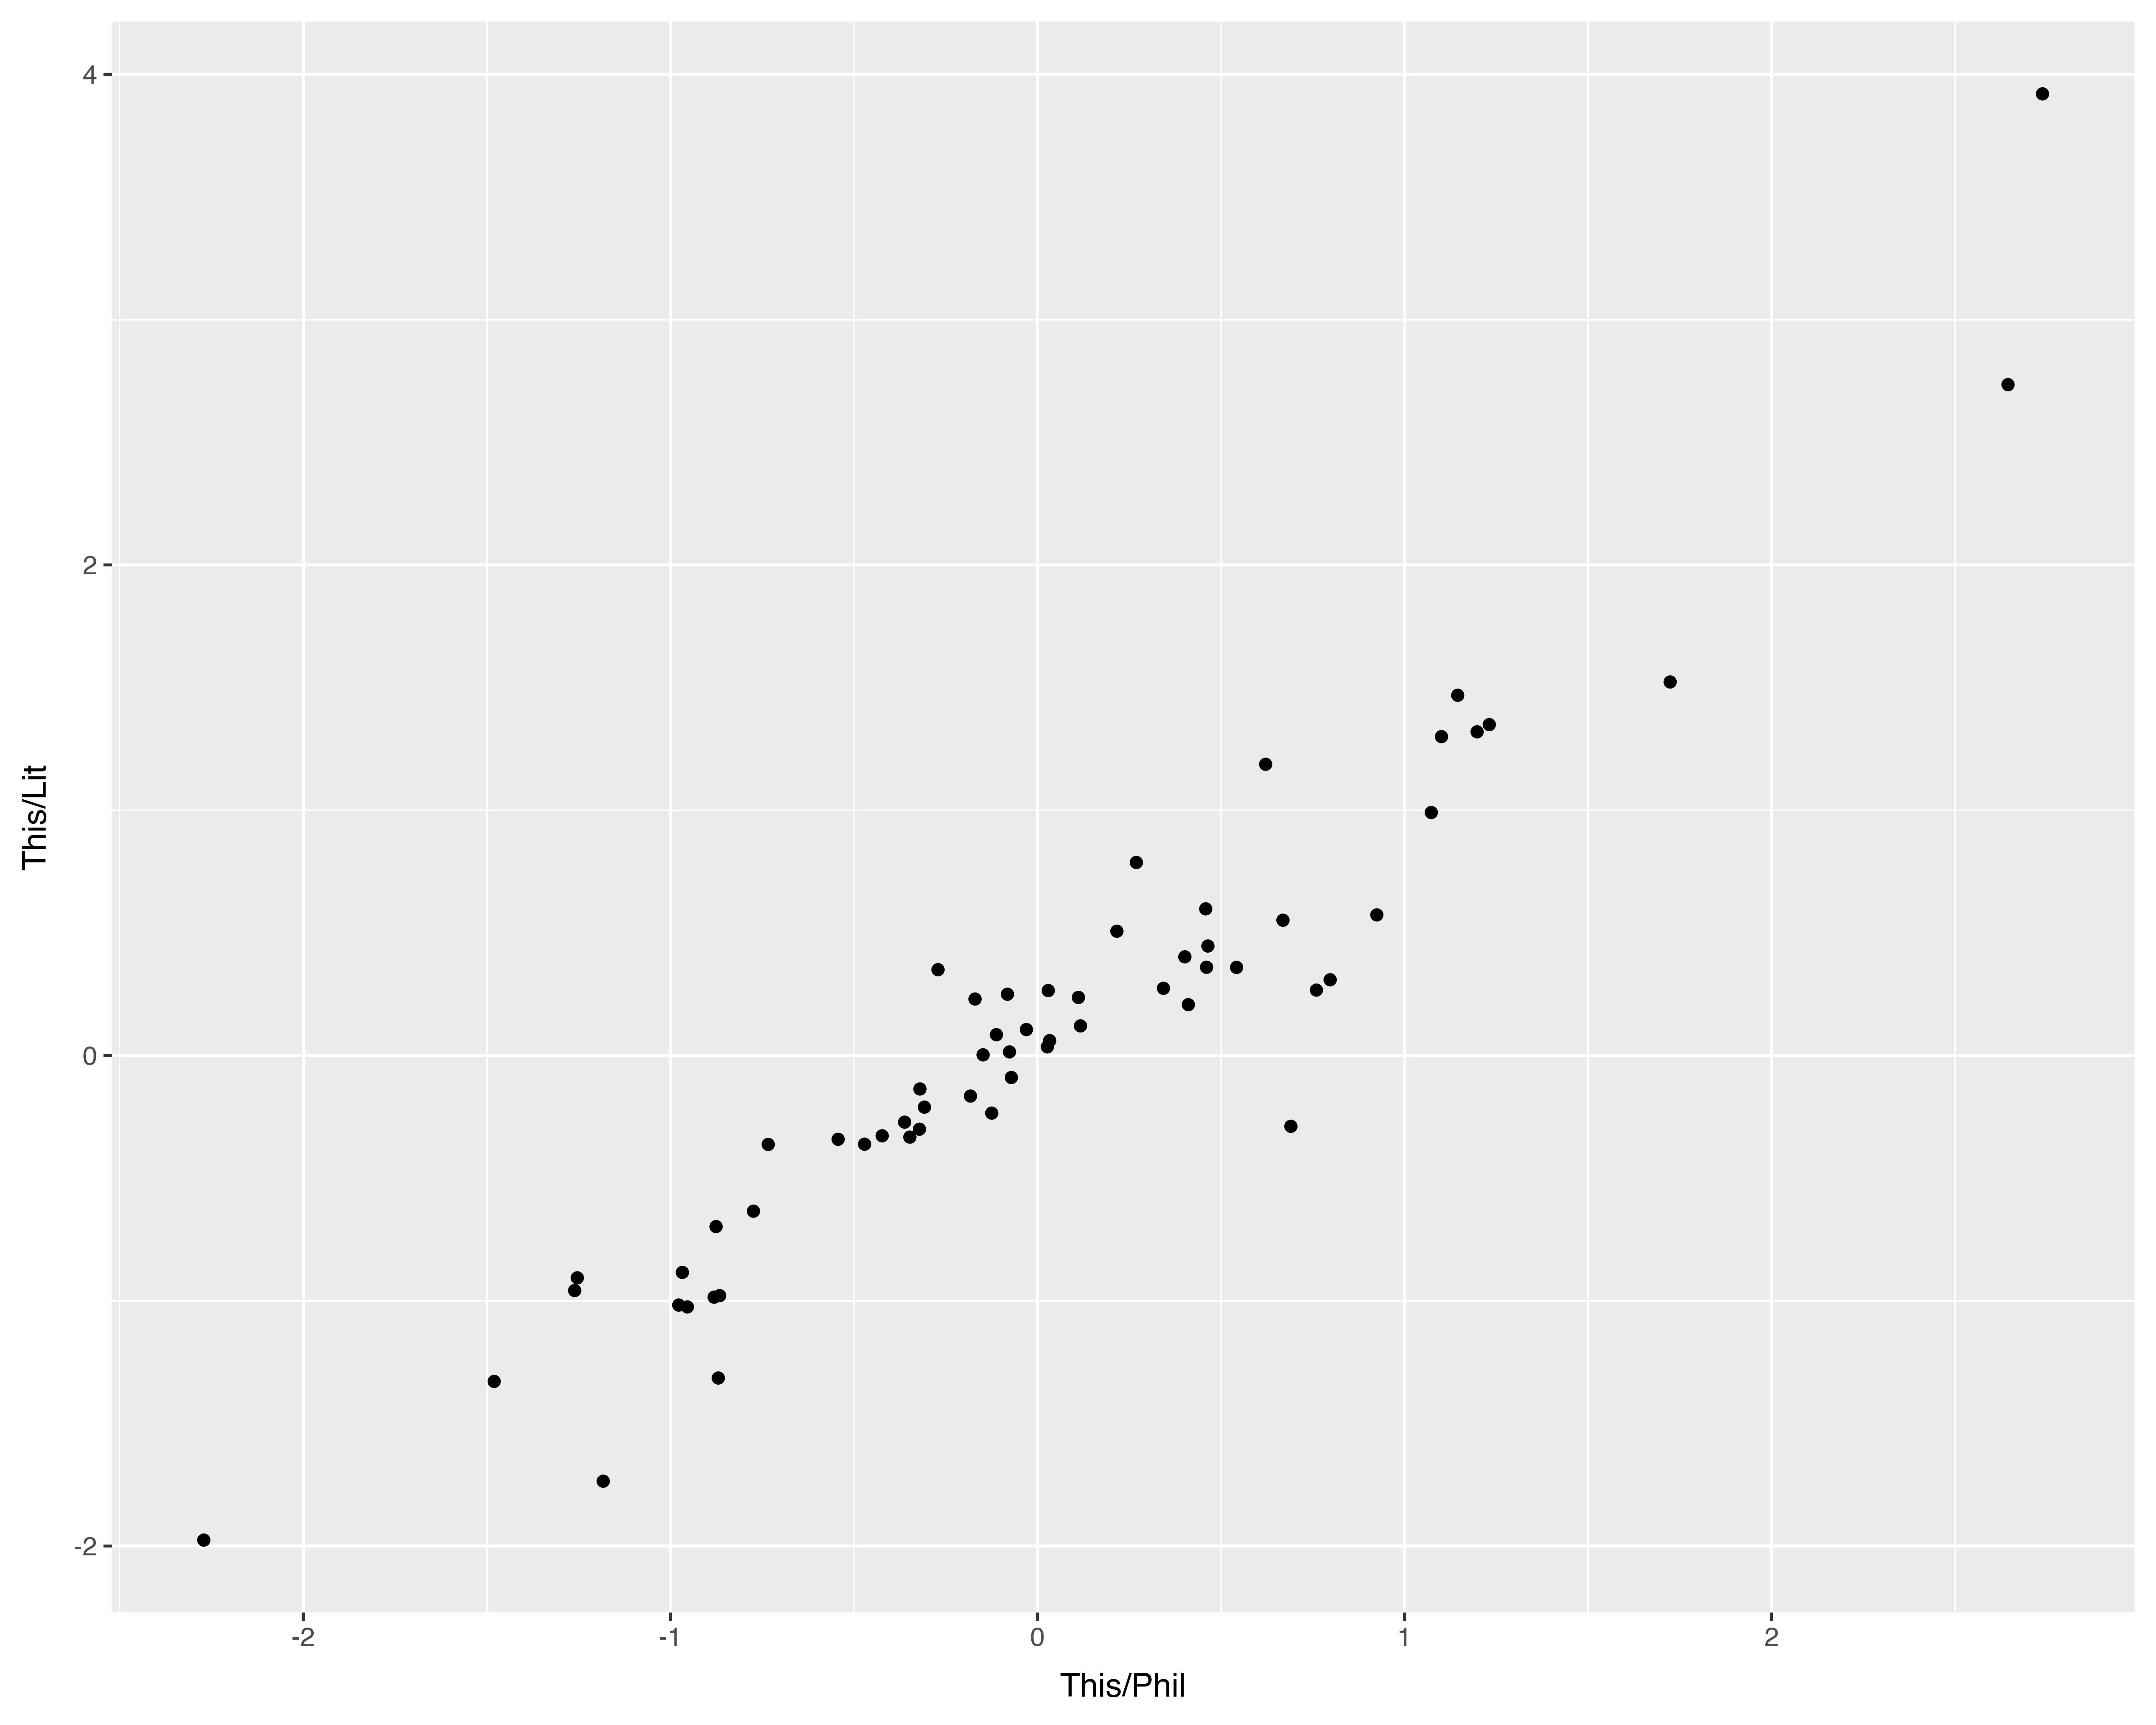

In [ ]:
fig = p9.ggplot(
    p9.aes(x='This/Phil', y='This/Lit'),
    df.reset_index()
) + (
    p9.geom_point()
)
fig

In [ ]:
text_id = "phil/10.2307/20111773"

In [ ]:
get_text_slice_ids(text_id)

['phil/10.2307/20111773__02', 'phil/10.2307/20111773__05']

In [ ]:
def get_df_nice_corpus():
    return get_nice_df_preds()

In [ ]:
get_nice_df_preds()

,text_id,discipline,title,author,journal,year,prob_Literature,prob_Philosophy,prob_Phil-Lit,prob_accuracy
0,lit/10.1086/341235,Literature,Did Philosophers Have to Become Fixated on Truth?,François Jullien;Janet Lloyd,Critical Inquiry,2002,0.617548,0.382452,-0.235096,0.617548
1,lit/10.1086/341236,Literature,Drill and Distraction in the Yellow Submarine: On the Dominance of War in Friedrich Kittler’s Media Theory,Geoffrey Winthrop‐Young,Critical Inquiry,2002,0.397658,0.602342,0.204685,0.397658
2,lit/10.1086/341237,Literature,The Morals of Metaphysics: Kant’s <em>Groundwork</em> as Intellectual <em>Paideia</em>,Ian Hunter,Critical Inquiry,2002,0.267603,0.732397,0.464793,0.267603
...,...,...,...,...,...,...,...,...,...,...
22290,phil/10.2307/48761521,Philosophy,What are Implicit Definitions?,"Eduardo N. Giovannini, Georg Schiemer",Erkenntnis,2021,0.042919,0.957081,0.914162,0.957081
22291,phil/10.2307/48761523,Philosophy,"Internalism, Externalism, and the KK Principle","Alexander Bird, Richard Pettigrew",Erkenntnis,2021,0.001594,0.998406,0.996812,0.998406
22292,phil/10.2307/48761525,Philosophy,Rigour and Intuition,Oliver Tatton-Brown,Erkenntnis,2021,0.151896,0.848104,0.696207,0.848104


In [ ]:
df_feats = get_all_feats()

KeyboardInterrupt: 

In [ ]:
df_feats

,sent_height,sent_num_words_in_dependent_clauses,sent_num_words_in_independent_clauses,sent_num_independent_clauses,sent_num_dependent_clauses,pos_IN,pos_NN,pos_JJ,pos_DT,"pos_,",...,deprel_discourse,deprel_vocative,pos_NFP,deprel_reparandum,deprel_csubj:outer,pos_SYM,deprel_orphan,deprel_goeswith,pos_AFX,pos_GW
id,,,,,,,,,,,,,,,,,,,,,
phil/10.2307/20111773__02,-0.390519,1.289891,-1.417418,-0.438993,1.207121,-0.070315,-1.706248,1.166067,-0.189528,1.310370,...,-0.595155,-0.367178,-0.226858,-0.470208,-0.218157,-0.216717,-0.169213,-0.026484,-0.06553,-0.033107
phil/10.2307/2379466__05,0.505629,1.583164,-1.733316,-0.492482,1.049130,0.117227,-0.279952,0.037163,-0.664539,-0.569395,...,-0.595155,-0.367178,-0.226858,-0.470208,-0.218157,-0.216717,-0.169213,-0.026484,-0.06553,-0.033107
lit/468313__05,-0.057800,-1.719735,1.824399,-0.290963,-1.893383,0.846476,0.914787,1.807776,1.373787,-0.438296,...,-0.595155,-0.367178,-0.226858,-0.470208,-0.218157,-0.216717,-0.169213,-0.026484,-0.06553,-0.033107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
phil/10.2307/2953730__03,1.122135,1.146417,-1.262875,-0.129505,1.833654,-0.538900,-0.544265,-1.380551,-1.149295,0.113526,...,-0.595155,-0.367178,-0.226858,-0.470208,-0.218157,-0.216717,-0.169213,-0.026484,-0.06553,-0.033107
lit/468421__06,-1.064896,-0.278295,0.271753,0.217638,-0.716220,-0.071856,0.649515,-0.145008,0.883376,0.509359,...,0.462582,-0.367178,-0.226858,-0.470208,-0.218157,-0.216717,-0.169213,-0.026484,-0.06553,-0.033107
phil/10.2307/2185617__06,0.865627,0.044130,-0.075547,1.067236,0.609709,1.904250,0.010231,-0.816354,-0.676448,-0.460911,...,-0.053499,-0.367178,-0.226858,-0.470208,-0.218157,-0.216717,5.909973,-0.026484,-0.06553,-0.033107
